In [6]:
import pandas as pd

df = pd.read_csv("student_performance_updated_1000.csv")
df.()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


| **Column**                  | **Meaning** |
|-----------------------------|-------------|
| **StudentID**               | a numiercal number (float) to tell the specefic student wer working on . and it is not important for predictions |
| **Name**                    | real name (string) for more spefic work also not importnet for predictions |
| **Gender**                  |  sex : male or female to see the better one at studying , we can see also that males are slighty more by 5% |
| **AttendanceRate**          | a float percentage from 0 to 100 to  see how often the student go to school to know if going to school helps or no its important for predictions |
| **StudyHoursPerWeek**       | a number of the hours (float) the student studies each week to see if going more is helpful |
| **PreviousGrade**           | the student old exam points (float) to see if he changed or still the same  |
| **ExtracurricularActivities** | number of activities the student participates in sport.. to see if activies help |
| **ParentalSupport**         | Level of support at home (Low / Medium / High) to see if getting supported helps we use it in predictions  |
| **FinalGrade**              | the student final score in the class which is the most important thing we are looking for |
| **Study Hours**             | the study-hours per day this time to see daily vs weekly  |
| **Attendance (%)**          | attendance percentage for online classes |
| **Online Classes Taken**    | a boolean true or false to see if taking online exams helps the student in points and we use it in predictions |

we can say that this database seeks to see if specefic manners affect student performance such as getting helped by parent or go to school or studing more the main thing the data base wants is to check performance (Final grade) to see how we can help students to get better grades 

first plot we histogram : we use it to see distribution of final grade of students and to see if its balanced or not in our case we have good distrubtion and no outliers

second plot box plot : to detect outliers and  median and to see how is the destrubtion  we can see that previious and final grade are close overall

third plot (scatter plot) : to check relation between study hours / week and the final grades Study hours do not strongly predict final grade

forth Heatmap to see which factors change together and have correlation 

last plot is the bar plot to compare grades of paretnail support to see if it helps with fianl grade

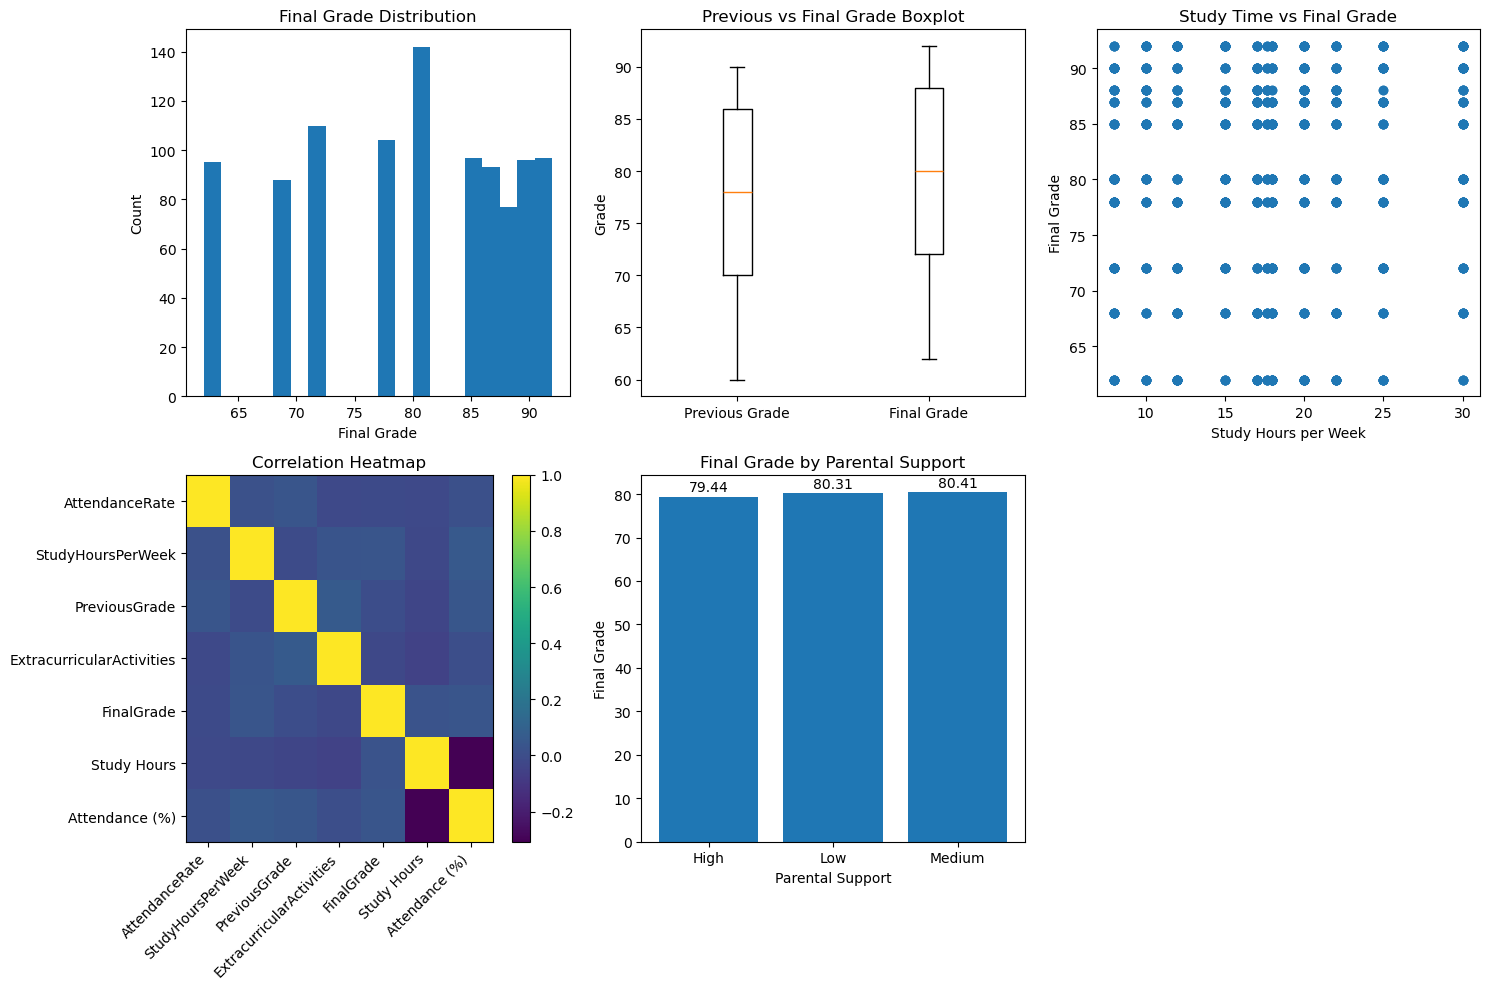

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("cleaned_student_performance.csv")

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df["FinalGrade"].dropna(), bins=20)
axes[0, 0].set_title("Final Grade Distribution")
axes[0, 0].set_xlabel("Final Grade")
axes[0, 0].set_ylabel("Count")

# Boxplot
axes[0, 1].boxplot(
    [df["PreviousGrade"].dropna(), df["FinalGrade"].dropna()],
    tick_labels=["Previous Grade", "Final Grade"]
)
axes[0, 1].set_title("Previous vs Final Grade Boxplot")
axes[0, 1].set_ylabel("Grade")

# Scatter plot
axes[0, 2].scatter(df["StudyHoursPerWeek"], df["FinalGrade"])
axes[0, 2].set_title("Study Time vs Final Grade")
axes[0, 2].set_xlabel("Study Hours per Week")
axes[0, 2].set_ylabel("Final Grade")

# Correlation heatmap
im = axes[1, 0].imshow(corr, aspect="auto")
axes[1, 0].set_title("Correlation Heatmap")
axes[1, 0].set_xticks(range(len(corr.columns)))
axes[1, 0].set_xticklabels(corr.columns, rotation=45, ha="right")
axes[1, 0].set_yticks(range(len(corr.index)))
axes[1, 0].set_yticklabels(corr.index)
fig.colorbar(im, ax=axes[1, 0])

# Bar plot
mean_values = df.groupby("ParentalSupport")["FinalGrade"].mean()
bars = axes[1, 1].bar(mean_values.index, mean_values.values)
axes[1, 1].set_title("Final Grade by Parental Support")
axes[1, 1].set_xlabel("Parental Support")
axes[1, 1].set_ylabel("Final Grade")

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(
        bar.get_x() + bar.get_width()/2,  
        height + 0.5,                     
        f'{height:.2f}',                  
        ha='center', va='bottom'
    )

axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("cleaned_student_performance.csv")
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# 1. Histogram
plt.figure(figsize=(7,5))
plt.hist(df["FinalGrade"].dropna(), bins=20)
plt.title("Final Grade Distribution")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("1_final_grade_hist.png")
plt.close()

# 2. Boxplot
plt.figure(figsize=(7,5))
plt.boxplot(
    [df["PreviousGrade"].dropna(), df["FinalGrade"].dropna()],
    labels=["Previous Grade", "Final Grade"]
)
plt.title("Previous vs Final Grade Boxplot")
plt.ylabel("Grade")
plt.tight_layout()
plt.savefig("2_prev_vs_final_boxplot.png")
plt.close()

# 3. Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df["StudyHoursPerWeek"], df["FinalGrade"])
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Hours per Week")
plt.ylabel("Final Grade")
plt.tight_layout()
plt.savefig("3_study_vs_final_scatter.png")
plt.close()

# 4. Correlation heatmap
plt.figure(figsize=(8,6))
im = plt.imshow(corr, aspect="auto")
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar(im)
plt.tight_layout()
plt.savefig("4_correlation_heatmap.png")
plt.close()

# 5. Bar plot
mean_values = df.groupby("ParentalSupport")["FinalGrade"].mean()
plt.figure(figsize=(7,5))
bars = plt.bar(mean_values.index, mean_values.values)
plt.title("Final Grade by Parental Support")
plt.xlabel("Parental Support")
plt.ylabel("Final Grade")

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("5_final_grade_by_parent_support.png")
plt.close()


C:\Users\mba\AppData\Local\Temp\ipykernel_11304\3464879219.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
